🔹 Problem Statement:
Predict solar power output based on environmental conditions (Sunlight, Temp, Cloud, etc.)

📌 Sample Dataset:
   Sunlight_Hours  Temperature  Cloud_Cover  Panel_Angle  Humidity  \
0              10           33           60           37        58   
1               7           22           99           16        53   
2               8           21           88           37        48   
3              10           30           99           26        68   
4               6           33           30           14        67   

   Wind_Speed  Power_Output_Watts  
0          19               485.8  
1           7               229.4  
2          14               299.8  
3          14               383.3  
4          15               257.5   

📈 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sunl

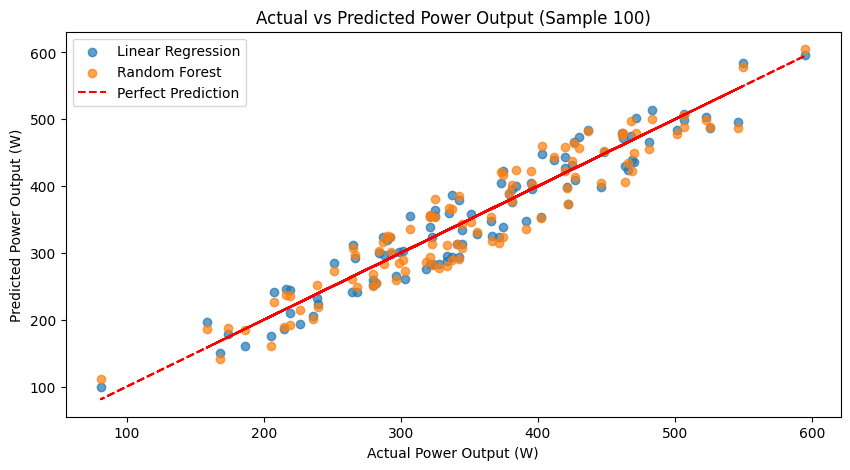

In [1]:
# 🌞 Solar Power Prediction using Machine Learning
# Week 1 + Week 2 Implementation

# ------------------------------
# Week 1
# ------------------------------

# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Step 2: Generate Synthetic Dataset (10,000 rows)
np.random.seed(42)

n_samples = 10000
data = {
    "Sunlight_Hours": np.random.randint(4, 12, n_samples),          # 4–12 hrs
    "Temperature": np.random.randint(15, 40, n_samples),            # 15–40 °C
    "Cloud_Cover": np.random.randint(0, 100, n_samples),            # 0–100 %
    "Panel_Angle": np.random.randint(10, 45, n_samples),            # 10–45 °
    "Humidity": np.random.randint(20, 80, n_samples),               # 20–80 %
    "Wind_Speed": np.random.randint(5, 20, n_samples)               # 5–20 km/h
}

df = pd.DataFrame(data)

# Generate target (Power Output in Watts) with randomness
df["Power_Output_Watts"] = (
    df["Sunlight_Hours"] * 40
    + df["Temperature"] * 2
    - df["Cloud_Cover"] * 1.5
    + df["Panel_Angle"] * 3
    - df["Humidity"] * 0.5
    + df["Wind_Speed"] * 1.2
    + np.random.randint(-50, 50, n_samples)   # noise
)

# Step 3: Problem Statement
print("🔹 Problem Statement:")
print("Predict solar power output based on environmental conditions (Sunlight, Temp, Cloud, etc.)\n")

# Step 4: Data Understanding
print("📌 Sample Dataset:")
print(df.head(), "\n")

print("📈 Dataset Info:")
print(df.info(), "\n")

print("🔎 Summary Statistics:")
print(df.describe(), "\n")

print("❓ Missing Values Check:")
print(df.isnull().sum(), "\n")

# ------------------------------
# Week 2
# ------------------------------

# Step 5: Data Splitting
X = df.drop("Power_Output_Watts", axis=1)
y = df["Power_Output_Watts"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"✅ Training set size: {X_train.shape}")
print(f"✅ Testing set size: {X_test.shape}\n")

# Step 6: Train Models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Step 7: Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Step 8: Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print(f"📊 {model_name} Performance:")
    print(f"R² Score: {r2:.3f}")
    print(f"Mean Absolute Error: {mae:.2f} W")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Percentage Error: {mape:.2f}%\n")
    return r2, mae, mse, mape

# Step 9: Evaluate Both Models
results = {}
results["Linear Regression"] = evaluate_model(y_test, y_pred_lr, "Linear Regression")
results["Random Forest"] = evaluate_model(y_test, y_pred_rf, "Random Forest")

# Step 10: Visualization - Actual vs Predicted
plt.figure(figsize=(10,5))
plt.scatter(y_test[:100], y_pred_lr[:100], label="Linear Regression", alpha=0.7)
plt.scatter(y_test[:100], y_pred_rf[:100], label="Random Forest", alpha=0.7)
plt.plot(y_test[:100], y_test[:100], color="red", linestyle="--", label="Perfect Prediction")
plt.xlabel("Actual Power Output (W)")
plt.ylabel("Predicted Power Output (W)")
plt.title("Actual vs Predicted Power Output (Sample 100)")
plt.legend()
plt.show()